Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 4.07E+00
	diameter = 1.0E-01, distance = 1.41E-01
	diameter = 1.0E-02, distance = 1.92E-02
	diameter = 1.0E-03, distance = 2.85E-03
Done!


Slope:1.032766415163158 intercept:0.4238926156242022


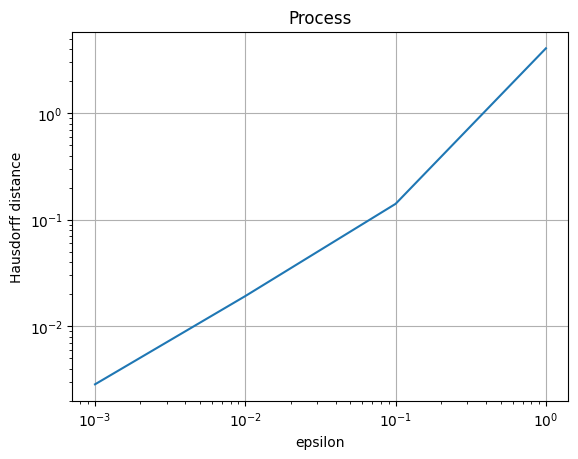

Process executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from src.models.lagrangean_model import LagrangeanModel, LagrangeanAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.process.process_SP import const_model
process_obj = -1126.4218270121305
process_sol = {"x1":1727.2601809997955,"x2":16000,"x3":104.23841082714829,"x5":2000}
process_y_bound = {"x1":[10,2000],"x2":[0,16000],"x3":[0,120],"x5":[0,2000]}

sto_m = const_model()
m = LagrangeanModel.from_sto_m(sto_m)
m.build()
alg=LagrangeanAlgo(m,solver="baron",lag_iter=20)
convergence_analysis(alg,process_sol,process_obj,start=-3,stop=0,steps=4,name="Process")
print("Process executed")